In [ ]:
from matplotlib import path as mpath

class OwnErrorMarker(mpath.Path):

    def __init__(self, *args, subtract_mean=True, **kwargs):
        super().__init__(*args, **kwargs)

        if subtract_mean:
            self.vertices = (self.vertices - self.vertices.mean(axis=0))
        self._vertices_orig = self.vertices
        self._scatter_kwargs = dict(facecolors='none',
                                    capstyle='round')

    def reset(self):
        self.vertices = self._vertices_orig

    def top(self, scale=1):
        self.vertices = self._vertices_orig * [scale, scale]
        return self

    def bot(self, scale=1):
        self.vertices = self._vertices_orig * [scale, -scale]
        return self

    def update_scatter_kwargs(self, **scatter_kwargs):
        self._scatter_kwargs.update(**scatter_kwargs)

    def get_scatter_kwargs(self):
        return self._scatter_kwargs

    def add_to_legend(self, ax, label, offset=3, ms=100,
                      rotate=True, scale=1, color='k',
                      do_not_use_label=False):
        loc_vertices = np.concatenate(
            [(self._vertices_orig + [0, offset]) * [scale, scale],
             (self._vertices_orig + [0, offset]) * [scale, -scale]])

        loc_codes = np.concatenate([self.codes, self.codes])

        if rotate:
            loc_vertices = loc_vertices @ [[0, 1], [1, 0]]

        return ax.scatter(np.nan, np.nan, s=ms, edgecolor=color,
                          marker=mpath.Path(loc_vertices, loc_codes),
                          label=None if do_not_use_label else label,
                          **self._scatter_kwargs)


ERROR_MARKERS = {
    "fancy": OwnErrorMarker(
        [[-2, -1], [-1, 1], [1, 1], [2, -1]],
        [mpath.Path.MOVETO, mpath.Path.LINETO,
         mpath.Path.LINETO, mpath.Path.LINETO]),
    "rectangle": OwnErrorMarker(
        [[-3, -1], [-3, 1], [3, 1], [3, -1]],
        [mpath.Path.MOVETO, mpath.Path.LINETO,
         mpath.Path.LINETO, mpath.Path.LINETO]),
    "triangle": OwnErrorMarker(
        [[-2, -1], [0, 1], [2, -1]],
        [mpath.Path.MOVETO, mpath.Path.LINETO,
         mpath.Path.LINETO]),
}

# plotting stuff
def plot_error_markers(ax, x, y, ydown, yup=None, markerstyle='rectangle',
                       scale=1, color='k', **scatter_kwargs):
    #from kapu.extension.markers import ERROR_MARKERS

    om = ERROR_MARKERS[markerstyle]

    scatter_kwargs.update(**om.get_scatter_kwargs())

    if yup is None:
        yup = ydown

    sca1 = ax.scatter(x, y + yup, edgecolors=color,
                      marker=om.top(scale), **scatter_kwargs)
    sca2 = ax.scatter(x, y - ydown, edgecolors=color,
                      marker=om.bot(scale), **scatter_kwargs)

    return (sca1, sca2), om

# legend stuff
def add_errormarker_labels(ax, markers, labels, colors=None,
                           new_legend=False, rotate=True, legend_kwargs={}):

    if colors is None:
        colors = ['k'] * len(markers)

    pcs = []
    for marker, label, color in zip(markers, labels, colors):
        marker = ERROR_MARKERS[marker]
        path_collection = marker.add_to_legend(ax, label, rotate=rotate, color=color,
do_not_use_label=new_legend)
        pcs.append(path_collection)

    if new_legend:
        legend = ax.legend(pcs, labels, **legend_kwargs)
        return legend
    else:
        pass

In [ ]:
from utils.binaries import *
from utils.plotting import *

fig, ax = plt.subplots()

dy = np.abs(np.random.normal(scale=5, size=50))
x = np.linspace(0, 10, 50)
y = x + dy

ax.errorbar(x, y, 0.5*dy, fmt='o', label='hallo')
plot_error_markers(ax, x, y, dy, s=20)


ax.legend()

In [2]:
from utils.auger.sd import sim

13:37:52 (   +6.2s) [INFO   ] -- import logging
13:37:52 (  +252ms) [INFO   ] -- import numpy as np
13:37:52 (   +10ms) [INFO   ] -- import uncertainties
13:37:52 (  +382ms) [INFO   ] -- import pandas as pd
13:37:52 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
13:37:52 (    +2ms) [INFO   ] -- import binaries.tools as tools
13:37:52 (    +2ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
13:37:52 (    +1ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
13:37:52 (    +0ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
13:37:52 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
13:37:52 (    +1ms) [INFO   ] -- set SCAN_PATH = PosixPath('/cr/data01/filip/xy-calibration')
13:37:52 (    +0ms) [INFO   ] -- set OFLN_PATH = PosixPath('/cr/data01/filip/offline/install')


In [4]:
test_sim = sim.Simulation('icrc2025-test7-SdMdInfillSimRec',
                        offline='icrc2025-test7',
                        src='/cr/users/filip/Projects/PhotonSimulations/discrimination/icrc2025-test5-SdMdInfillSimRec',
                        request_memory = "6G",
                        primary="proton",
                        energy="18_18.5",
                        model="epos_lhc",
                        seed = 5,
                        queue = 5000,
                        verbose=False)

13:38:06 (  +11.0s) [INFO   ] -- filesystem established successfully
13:38:06 (    +5ms) [INFO   ] -- Corsika n_files = 3035, queue = 2500, rethrows = 2 => 5000 sims
13:38:06 (    +5ms) [INFO   ] -- Corsika n_files = 3035, queue = 2500, rethrows = 2 => 5000 sims
13:38:06 (    +5ms) [INFO   ] -- scripts have been written
13:38:07 (   +1.5s) [INFO   ] -- source compiled, we're done!


In [ ]:
print(os.listdir("/lsdf/auger/corsika/prague/EPOS_LHC/photon/17_17.5"))

In [ ]:
is_sim_file = (lambda s: s.startswith("DAT")
                           and not s.endswith(".long")
                           and not s.endswith(".lst")
                           and not s.endswith(".gz"))

target_path = '/lsdf/auger/corsika/prague/EPOS_LHC/photon/16_16.5'
print(len(list(filter(is_sim_file, os.listdir(target_path)))))

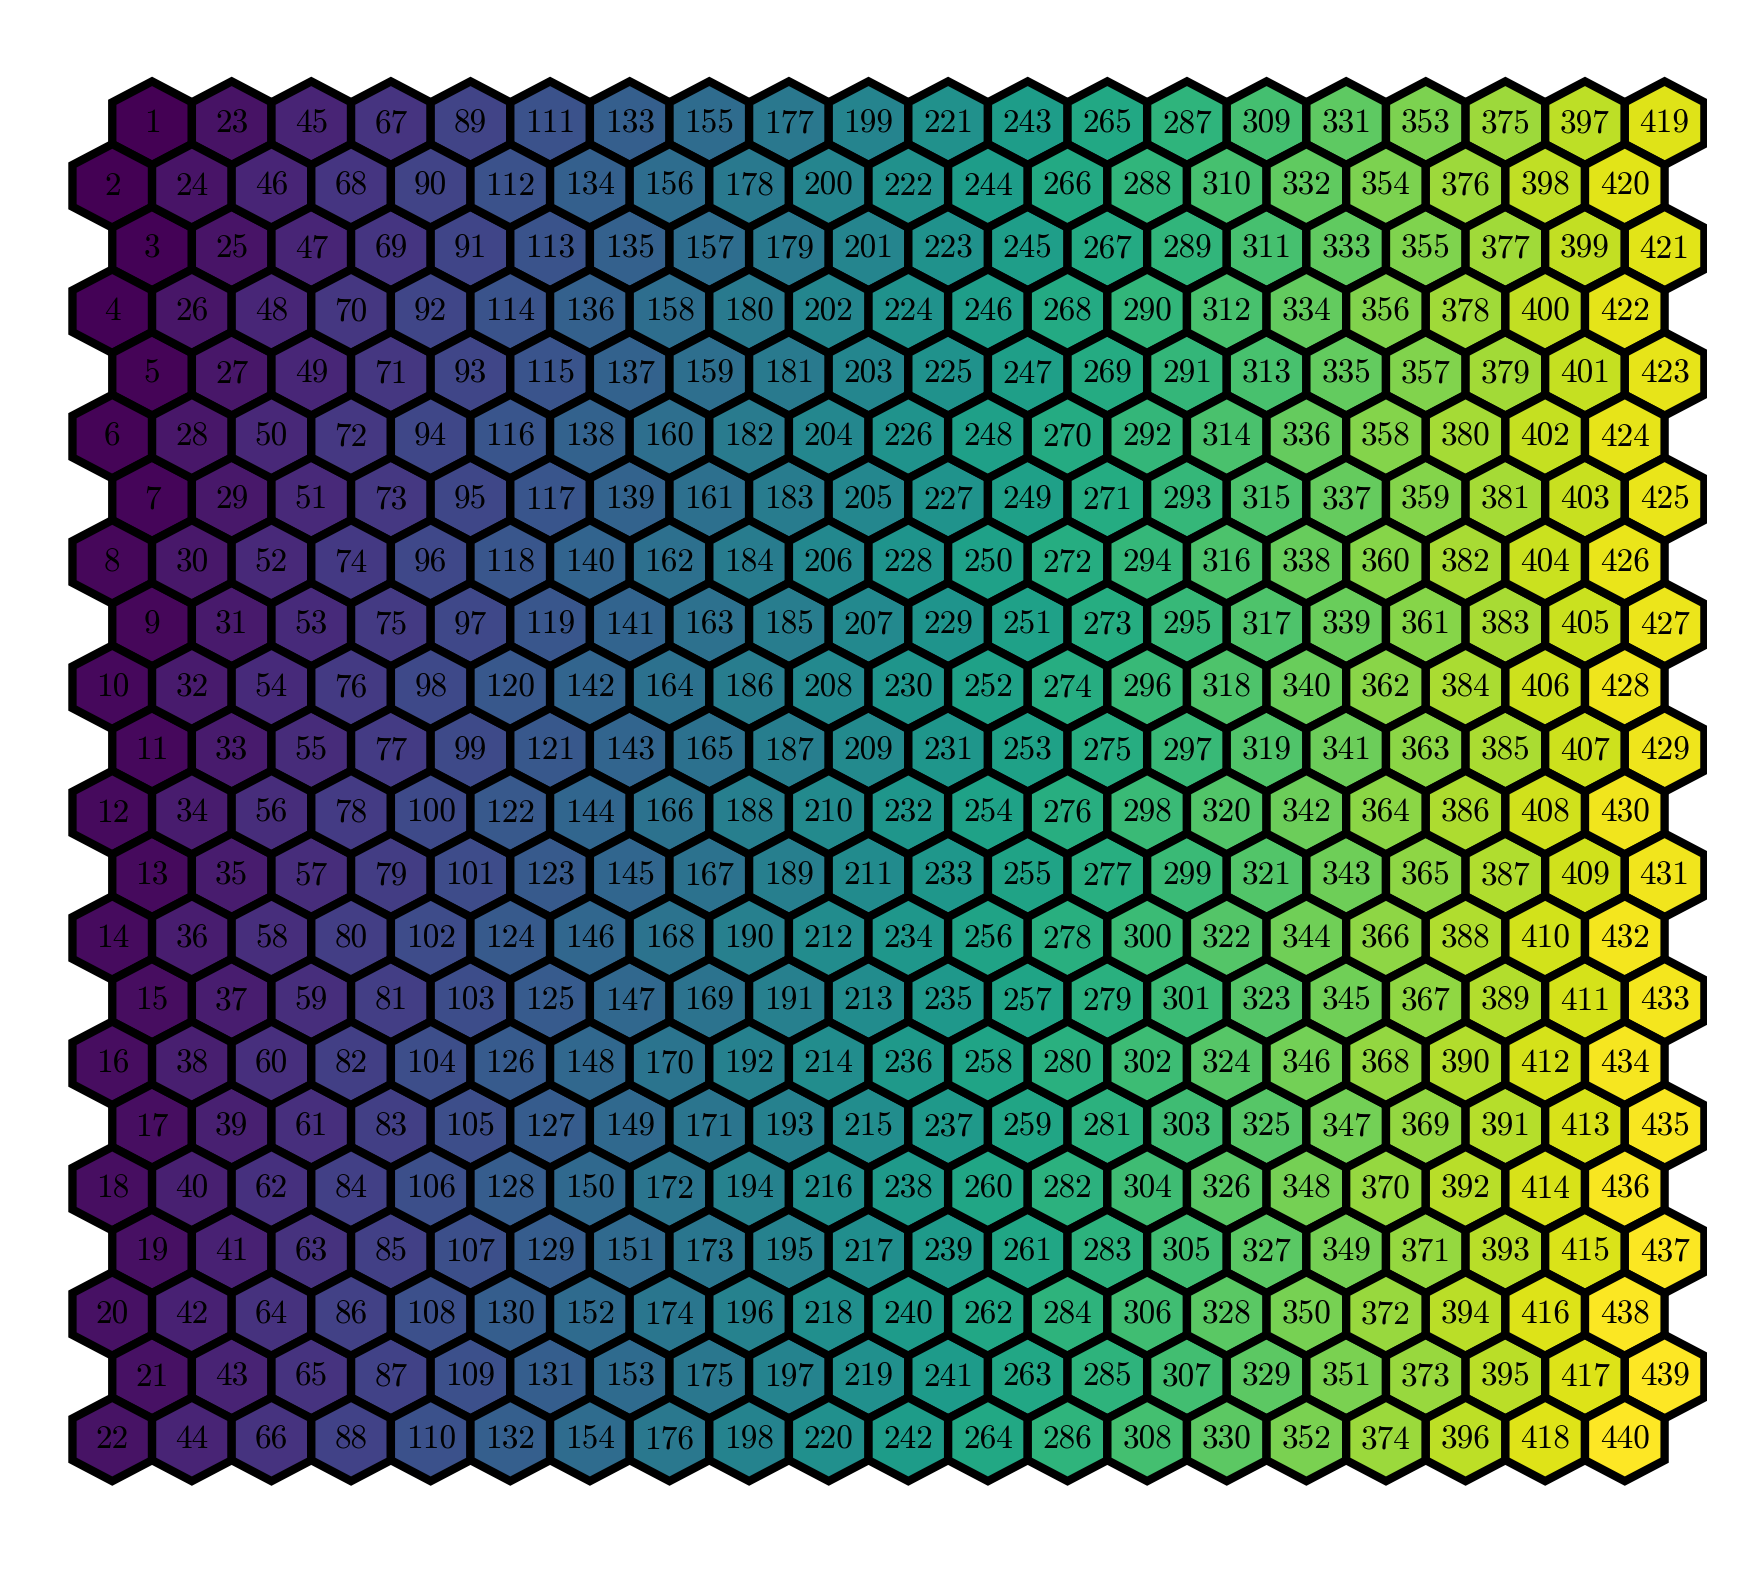

In [7]:
from utils.binaries import *
from utils.plotting import *

def PixelPlot(
    pixel_data: np.ndarray,
    ax=None,
    title=None,
    vmin=None,
    vmax=None,
    norm=None,
    cmap=None,
    annotate=False,
    markpixels=[],
    markcolor="red",
    **kwargs,
) -> plt.axes:
    """Plot a pixel array to the standard FD display mode of hexagonal grids"""

    from matplotlib.patches import RegularPolygon
    from matplotlib.colors import Normalize

    ax = ax if ax is not None else plt.gca()
    ax.set_title(title if title is not None else ax.get_title())
    three_sigma_cut = lambda d: d[np.abs(d - np.nanmean(d))/np.nanstd(d) < 3]

    cmap = cmap if cmap is not None else plt.cm.viridis
    vmin = vmin if vmin is not None else np.min(three_sigma_cut(pixel_data))
    vmax = vmax if vmax is not None else np.max(three_sigma_cut(pixel_data))
    norm = norm if norm is not None else Normalize(vmin=vmin, vmax=vmax)

    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)

    for ipix, pixel in enumerate(pixel_data, 1):

        # determine pixel location
        col = int(np.ceil(ipix / 22.0))
        row = int(ipix - 22 * (col - 1))


        # determine hexagon viewing angle
        centerRow = 35 / 3.0
        elevation_angle = (row - centerRow) * 1.5 * np.sqrt(3) / 2
        centerCol = 10.5 - 0.5 * (row % 2)
        azimuth_angle = (col - centerCol) * 1.5

        hexagon = RegularPolygon(
            (azimuth_angle, elevation_angle),
            numVertices=6,
            radius=0.866,
            orientation=np.radians(60),
            facecolor=cmap(norm(pixel)),
            edgecolor=markcolor if ipix in markpixels else "k",
            lw=kwargs.get("marklw", 1) if ipix in markpixels else kwargs.get("lw", 1),
            zorder=2 if ipix in markpixels else 1,
        )

        if annotate:
            ax.text(azimuth_angle, elevation_angle,
            str(ipix), ha='center', va='center', fontsize=4)

        ax.add_patch(hexagon)

    ax.set_xlim(-15.8, 15.8)
    ax.set_ylim(-15.8, 15.8)
    ax.invert_yaxis()
    ax.set_aspect(20 / 22)

    if kwargs.get("axis_off", True):
        ax.axis("off")
    return ax

test = PixelPlot(np.arange(440), annotate=True)